In [1]:
#import os
#os.chdir('/home/mackenzie/workspace/PycharmProjects/DAADRISE_AbusiveLangProject/featureExtraction/')
%cd ../featureExtraction/

/home/mackenzie/workspace/PycharmProjects/DAADRISE_AbusiveLangProject/featureExtraction


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
from featurE_eng import getTrainData, getTestData

/home/mackenzie/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


importing Jupyter notebook from featurE_eng.ipynb
Completing ngram generation for train
Completing ngram generation for test
Completing char-ngram generation for train
Completing char-ngram generation for test
Completing tfidf+ngram generation for train
Completing tfidf+ngram generation for test
Completing char-tfidf+ngram generation for train
Completing char-tfidf+ngram generation for test
Completing the sentiment analysis for train
Completing the sentiment analysis for test
Completing the liguistic feature extraction for train
Completing the liguistic feature extraction for test
Completing the readability scores extraction for train
Completing the readability scores extraction for test
Concatenating in process
Did it!


In [3]:
# retrieve the features from the featureExtraction file
data = getTrainData()
print(data.shape)

(19808, 4031)


In [4]:
# grab the features and target variable
X = data.iloc[:,0:4030]  #independent columns, change column number depending on what we have for shape
y = data.iloc[:,-1]    #target column i.e labels

In [5]:
# Univariate Selection -- apply SelectKBest class to extract top 100 best features
bestfeatures = SelectKBest(score_func=f_classif, k=100)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print('Univariate Selection features found, use getUnivariateData() to get the features')
# Extract the top 100 features
uni_selected_feat = featureScores.nlargest(100,'Score')
print(uni_selected_feat) # print out the top 100 features selected

# Saving the top 100 features to a data frame
#print(a.iloc[0].name) # how to get the column # for the ith feature
#print(a.iloc[0][0]) # how to get the header column
top_univariate_features = pd.DataFrame()
for i in range(0, 100):
    curr_column_vals = X.iloc[:, uni_selected_feat.iloc[i].name]
    curr_column_name = uni_selected_feat.iloc[i][0]
    top_univariate_features[curr_column_name] = curr_column_vals
#top_univariate_features.to_csv('C:\\Users\\mikec\\Documents\\UnivariateFeatures.csv', index=None, header=True, encoding='utf-8')
#y.to_csv('C:\\Users\\mikec\\Documents\\TrainLabels.csv', index=None, header=True, encoding='utf-8')
top_univariate_features.to_csv('/home/mackenzie/workspace/PycharmProjects/DAADRISE_AbusiveLangProject/dataFeatureSelected/UnivariateFeatures.csv', index=None, header=True, encoding='utf-8')
y.to_csv('/home/mackenzie/workspace/PycharmProjects/DAADRISE_AbusiveLangProject/dataFeatureSelected/TrainLabels.csv', index=None, header=True, encoding='utf-8')

Univariate Selection features found, use getUnivariateData() to get the features
          Specs        Score
76     bitch_nw  1880.111408
1342    bitc_nc  1878.096858
1343   bitch_nc  1878.096858
1022    bitc_nc  1877.593354
1602   itch _nc  1864.593042
1021     bit_nc  1846.728725
1341     bit_nc  1840.749266
1601    itch_nc  1837.998935
1600     itc_nc  1834.324330
1889    tch _nc  1709.313722
1888     tch_nc  1675.051534
1887      tc_nc  1657.428884
3342    bitc_tc  1530.192525
3343   bitch_tc  1530.192525
3022    bitc_tc  1529.876762
3602   itch _tc  1529.871140
3601    itch_tc  1518.734150
3600     itc_tc  1517.178436
3021     bit_tc  1511.387977
3341     bit_tc  1509.217853
1361     ch _nc  1483.234231
3889    tch _tc  1480.486044
3888     tch_tc  1470.295649
3887      tc_tc  1463.245805
4000  sentiment  1374.773723
3361     ch _tc  1363.410744
3598      it_tc  1193.740148
1018      bi_nc  1140.308383
3018      bi_tc  1085.071235
1598      it_nc  1058.805136
...         ...     

Feature Importance results saved, use getFeatureImpt() to get the features
itch_tc            0.009161
bitc_nc            0.008921
 bit_nc            0.008843
bit_tc             0.007148
tch_tc             0.006867
hoe_tc             0.006574
itch _tc           0.006361
itc_nc             0.006069
oe_tc              0.005972
oe _tc             0.005584
hoe _tc            0.005409
bitc_tc            0.005301
 hoe _tc           0.005298
itch _nc           0.005250
 hoe_nc            0.005153
bitch_nw           0.004941
itc_tc             0.004900
 bitc_nc           0.004836
ho_tc              0.004779
 hoe_tc            0.004758
ch _nc             0.004747
 bit_tc            0.004726
hoe_nw             0.004711
sentiment          0.004698
itch_nc            0.004508
bitch_tw           0.004358
tc_tc              0.004318
hoe_tw             0.004190
hoe_nc             0.004130
tch _nc            0.003958
                     ...   
nig_tc             0.002173
 pu_tc             0.002145
 

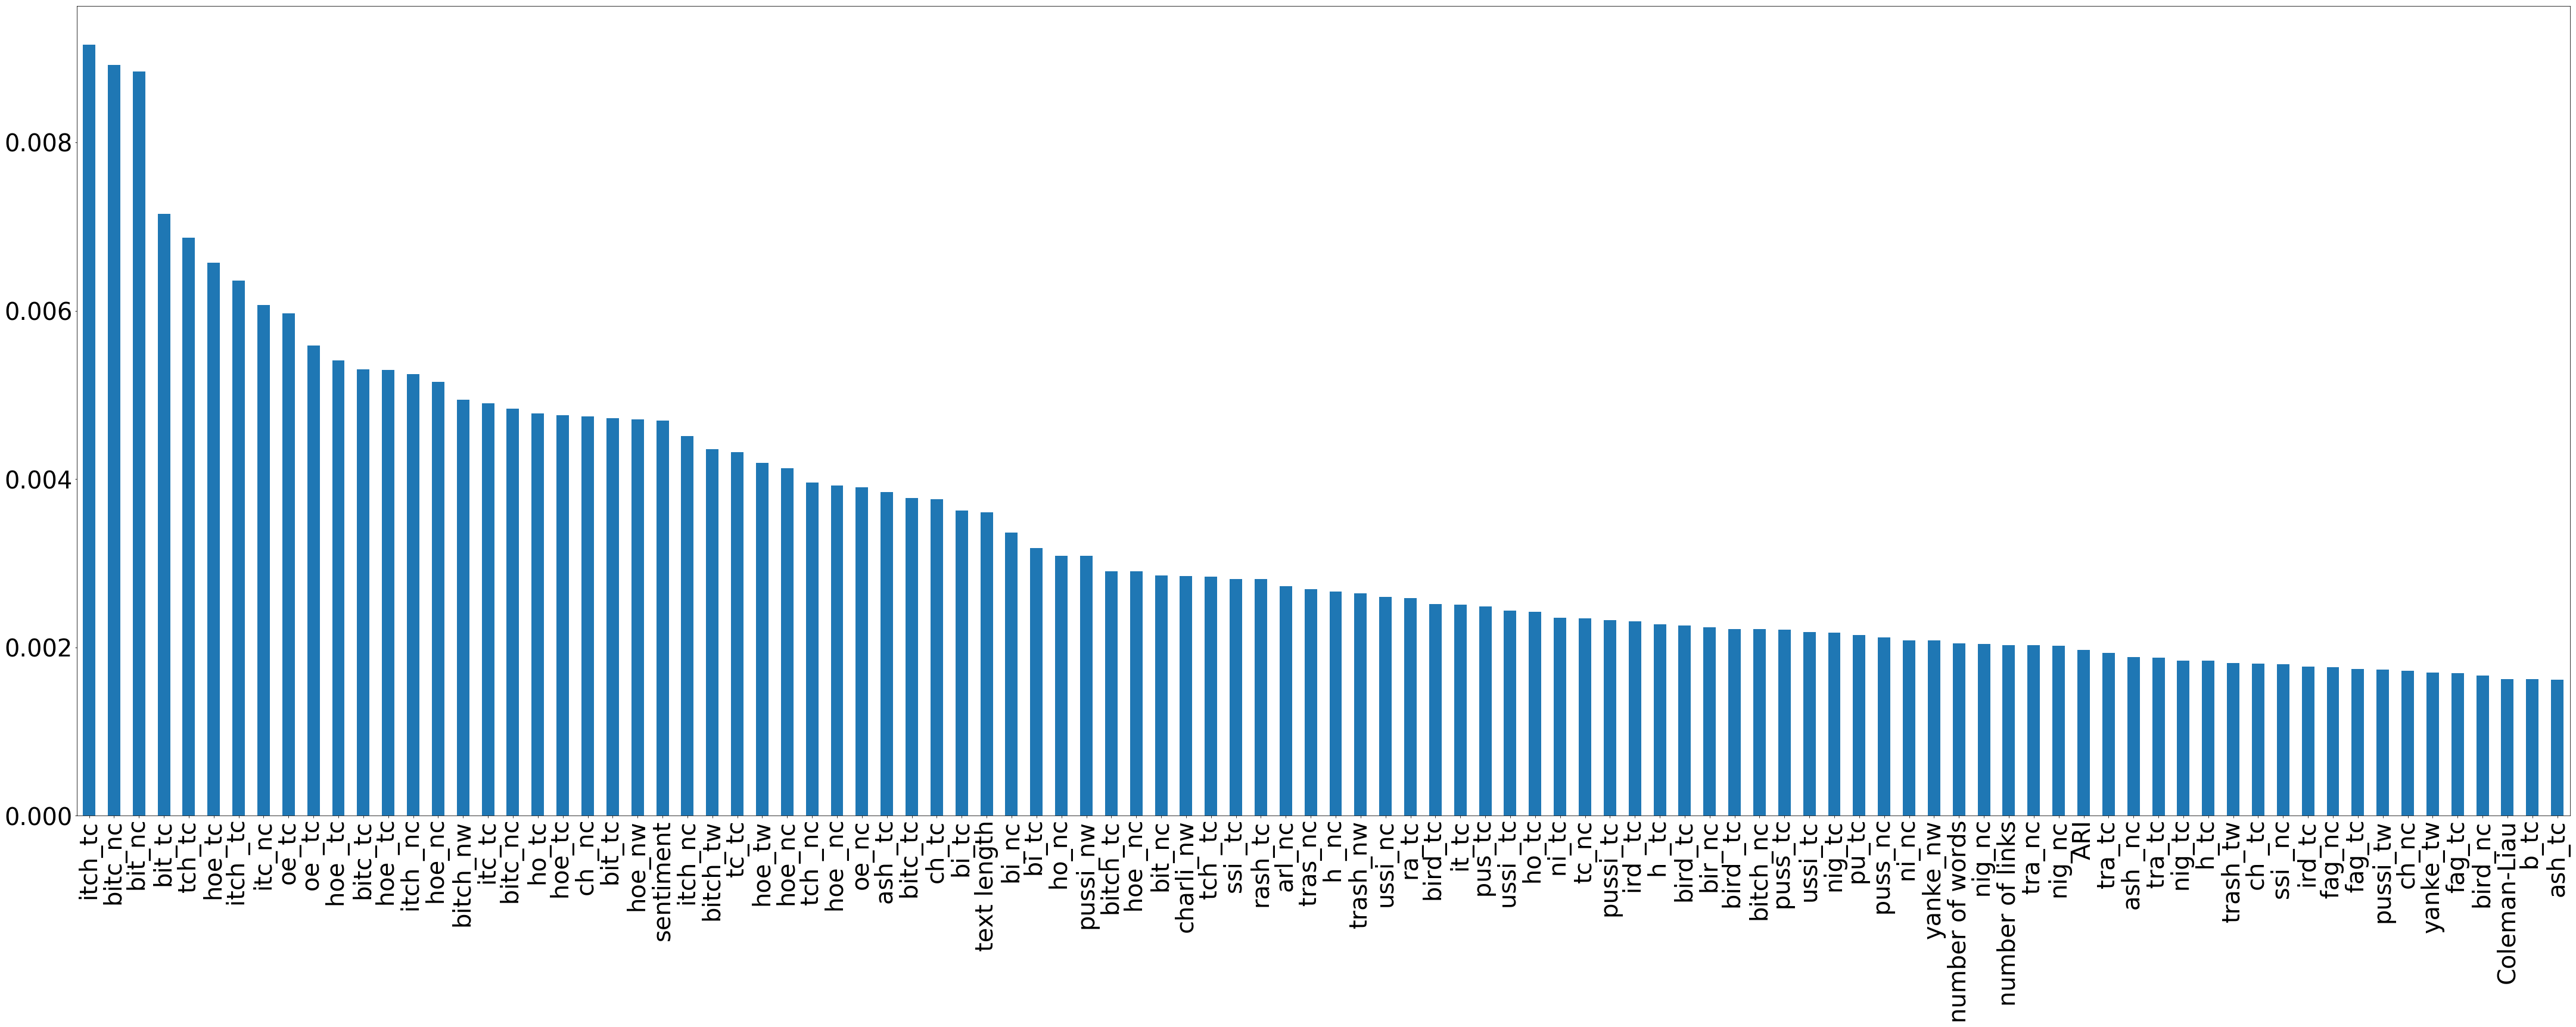

In [6]:
# Feature Importance 
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
print('Feature Importance results saved, use getFeatureImpt() to get the features')
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_feat_impt = feat_importances.nlargest(100) 
print(top_feat_impt) # prints out the 100 best features

# The top 100 most important features in bar graph
top_feat_impt.plot(figsize=(75, 25),fontsize=40,kind='bar')
plt.show()

# Saving the top 100 features to a dataframe
list_names = top_feat_impt.axes 
best_impt_features = pd.DataFrame()
#print(X.columns.get_loc(list[0][0])) # how to get the index of the column/name from the feature selected names
for i in range(0, 100):
    curr_column_name = list_names[0][i]
    curr_column_index = X.columns.get_loc(curr_column_name)
    curr_column_vals = X.iloc[:, curr_column_index]
    best_impt_features[curr_column_name] = curr_column_vals

In [7]:
# Feature extraction for test data
data_test = getTestData()
X_test = data_test.iloc[:,0:4030]
y_test = data_test.iloc[:,-1]

# univariate
top_univariate_features_test = pd.DataFrame()
for i in range(0, 100):
    curr_column_vals = X_test.iloc[:, uni_selected_feat.iloc[i].name]
    curr_column_name = uni_selected_feat.iloc[i][0]
    top_univariate_features_test[curr_column_name] = curr_column_vals
    
#top_univariate_features_test.to_csv('C:\\Users\\mikec\\Documents\\UnivariateFeaturesTest.csv', index=None, header=True, encoding='utf-8')
#y_test.to_csv('C:\\Users\\mikec\\Documents\\TestLabels.csv', index=None, header=True, encoding='utf-8')
top_univariate_features_test.to_csv('/home/mackenzie/workspace/PycharmProjects/DAADRISE_AbusiveLangProject/dataFeatureSelected/UnivariateFeaturesTest.csv', index=None, header=True, encoding='utf-8')
y_test.to_csv('/home/mackenzie/workspace/PycharmProjects/DAADRISE_AbusiveLangProject/dataFeatureSelected/TestLabels.csv', index=None, header=True, encoding='utf-8')
# Saving the top 100 features to a dataframe
list_names = top_feat_impt.axes 
best_impt_features_test = pd.DataFrame()
#print(X.columns.get_loc(list[0][0])) # how to get the index of the column/name from the feature selected names
for i in range(0, 100):
    curr_column_name = list_names[0][i]
    curr_column_index = X_test.columns.get_loc(curr_column_name)
    curr_column_vals = X_test.iloc[:, curr_column_index]
    best_impt_features_test[curr_column_name] = curr_column_vals

In [8]:
# Functions for returning top features of different feature selection algorithms
def getUnivariateData():
    return top_univariate_features

def getFeatureImpt():
    return best_impt_features

def getLabels():
    return y

# Test data
def getUnivariateTestData():
    return top_univariate_features_test

def getFeatureImptTest():
    return best_impt_features_test

def getTestLabels():
    return y_test

In [9]:
# Compare the univariate and featureImpt selected features
titles_univariate = getUnivariateData().columns
titles_impt = getFeatureImpt().columns
count = 0
for i in range(0, len(titles_univariate)):
    if titles_univariate[i] in titles_impt:
        #print(titles_univariate[i]+' in both!')
        count+=1
print('The number of same features selected is: ' + str(count))

The number of same features selected is: 54


In [10]:
# Correlation Matrix with Heatmap -- get correlations of each features in dataset
#corrmat = data.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#plot heat map
#g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")